Importing Library
1. Data Import :- DONE
2. Data Preprocessing. :- 
        2.1 Data Cleaning. :- DONE
            a. missing values numerical/categorical :- DONE
            b. Duplicate values :- DONE
        2.2 Encoding categorical variables. :- DONE
        2.3 Feature selection. :- DONE
        2.5 Dimensionality Reduction. :- 
3. Spliting Datasets. :- DONE
4. Data transformation 
        4.1 Data Scalling and normalization. :- DONE
5. Handling imbalance Dataset. 
6. Adressing Outliers. :- DONE
7. Train model. :-
8. Hyper parameter tuning. :-

# import all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
import warnings
warnings.filterwarnings(action="ignore")

# 1 data import 

In [2]:
data = pd.read_csv('delhi_house.csv')
data.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0
8,985.0,3,3.0,Unfurnished,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1258 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [4]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


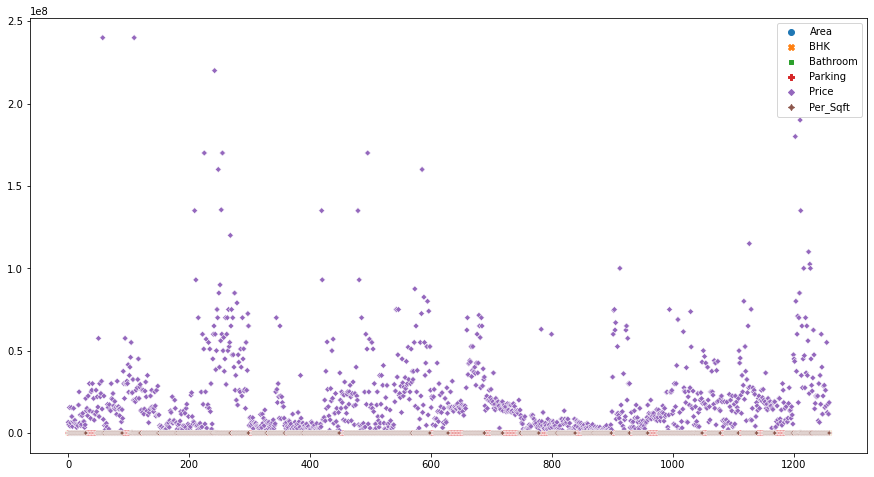

In [5]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data)
plt.show()

CONCLUSION :-

1. There are 1259 Entries.
2. 5 columns with numerical and 6 columns with categorical data. Total 11 columns.
3. there are missing values.

# 2 data Preprocessing

**2|1. Cleaning data :**

1. Missing Values

In [6]:
data.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         1
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [7]:
data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [8]:
np.dtype(data.Area)

dtype('float64')

In [9]:
numerical_data = []
categorical_data = []
for i in data.columns:
    if np.dtype(data[i]) =='O':
        categorical_data.append(i)
    else:
        numerical_data.append(i)
print("Numerical columns : ",numerical_data,"\nCategorical Columns : ",categorical_data)

Numerical columns :  ['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Per_Sqft'] 
Categorical Columns :  ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']


***numerical :--***

In [10]:
for i in numerical_data:
    print("Missing values in column {0} : {1}".format(i,data[i].isna().sum()))

Missing values in column Area : 0
Missing values in column BHK : 0
Missing values in column Bathroom : 2
Missing values in column Parking : 33
Missing values in column Price : 0
Missing values in column Per_Sqft : 241


Conclusion :
1. **0.15%** values are missing from Bathroom .
    Suggestion :- Delete Rows.
2. **2.6%** Values missing from Parking.
    Suggetion :- Fill with 0 or fill with KNN or Regression imputation algorithm.
3. Almost **19%** of values from Per_Sqft.
    Suggetion :- fill data with predictive algorithm.

**---------- Deleting 2 Rows from Bathroom. ----------**

In [11]:
data.dropna(subset=['Bathroom'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1257 non-null   float64
 1   BHK          1257 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1252 non-null   object 
 4   Locality     1256 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1257 non-null   int64  
 7   Status       1257 non-null   object 
 8   Transaction  1257 non-null   object 
 9   Type         1252 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 117.8+ KB


**---------- Filing missing values with KNN or Iterative imputer. ----------**

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer

In [13]:
data_impute = data.drop(columns=[i for i in categorical_data])
data_impute

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
0,800.0,3,2.0,1.0,6500000,NaN
1,750.0,2,2.0,1.0,5000000,6667.0
2,950.0,2,2.0,1.0,15500000,6667.0
3,600.0,2,2.0,1.0,4200000,6667.0
4,650.0,2,2.0,1.0,6200000,6667.0
...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,12916.0
1255,1050.0,3,2.0,3.0,12500000,12916.0
1256,875.0,3,3.0,3.0,17500000,12916.0
1257,990.0,2,2.0,1.0,11500000,12916.0


In [14]:
data_impute.isna().sum()

Area          0
BHK           0
Bathroom      0
Parking      31
Price         0
Per_Sqft    239
dtype: int64

In [15]:
# Applying KNN 
knnImp = KNNImputer()
fit_data = knnImp.fit_transform(data_impute.drop(columns='Per_Sqft'))
fit_data = pd.DataFrame(fit_data,columns=[i for i in numerical_data[:-1]])
fit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1257 non-null   float64
 1   BHK       1257 non-null   float64
 2   Bathroom  1257 non-null   float64
 3   Parking   1257 non-null   float64
 4   Price     1257 non-null   float64
dtypes: float64(5)
memory usage: 49.2 KB


In [16]:
fit_data.isna().sum()

Area        0
BHK         0
Bathroom    0
Parking     0
Price       0
dtype: int64

In [17]:
fit_data.tail()

,Area,BHK,Bathroom,Parking,Price
1252,4118.0,4.0,5.0,3.0,55000000.0
1253,1050.0,3.0,2.0,3.0,12500000.0
1254,875.0,3.0,3.0,3.0,17500000.0
1255,990.0,2.0,2.0,1.0,11500000.0
1256,11050.0,3.0,3.0,1.0,18500000.0


In [18]:
# Replacing Fit_data values with data_impute values.
for i in fit_data.columns:
    data_impute.replace(data_impute[i].values,fit_data[i].values,inplace=True)
data_impute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1257 non-null   float64
 1   BHK       1257 non-null   int64  
 2   Bathroom  1257 non-null   float64
 3   Parking   1257 non-null   float64
 4   Price     1257 non-null   int64  
 5   Per_Sqft  1257 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 68.7 KB


In [19]:
data_impute.isna().sum()

Area        0
BHK         0
Bathroom    0
Parking     0
Price       0
Per_Sqft    0
dtype: int64

**---------- Imputing Per_Sqft values using Iterative Imputer ----------**

In [20]:
# Applying Iterative Imputer.
IterImp = IterativeImputer()
Imputed_data = pd.DataFrame(IterImp.fit_transform(data_impute),columns=[i for i in numerical_data])
Imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1257 non-null   float64
 1   BHK       1257 non-null   float64
 2   Bathroom  1257 non-null   float64
 3   Parking   1257 non-null   float64
 4   Price     1257 non-null   float64
 5   Per_Sqft  1257 non-null   float64
dtypes: float64(6)
memory usage: 59.0 KB


In [21]:
# Replacing Imputed_data with data.
for i in Imputed_data.columns:
    data.replace(data[i].values,Imputed_data[i].values,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1257 non-null   float64
 1   BHK          1257 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1252 non-null   object 
 4   Locality     1256 non-null   object 
 5   Parking      1257 non-null   float64
 6   Price        1257 non-null   int64  
 7   Status       1257 non-null   object 
 8   Transaction  1257 non-null   object 
 9   Type         1252 non-null   object 
 10  Per_Sqft     1257 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 117.8+ KB


In [22]:
data.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       1
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

**DONE :-**
1. Missing values from Bathroom is removed.
2. Using knnImputer filled all values of columns except Per_Sft column.
3. Using IterativeImputer missing values are fillied in Per_Sft Column.

***b. Duplicate Values***

In [23]:
data.duplicated().value_counts()

False    1176
True       81
dtype: int64

In [24]:
data.drop_duplicates(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1176 non-null   float64
 1   BHK          1176 non-null   int64  
 2   Bathroom     1176 non-null   float64
 3   Furnishing   1171 non-null   object 
 4   Locality     1175 non-null   object 
 5   Parking      1176 non-null   float64
 6   Price        1176 non-null   int64  
 7   Status       1176 non-null   object 
 8   Transaction  1176 non-null   object 
 9   Type         1171 non-null   object 
 10  Per_Sqft     1176 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 110.2+ KB


**------All Missing values of Numerical Data type are Imputed as well as Duplicates are deleted.------**

***categorical :--***
1. There are only 0.4% missing values in Furnisshing And Type Column.
        suggestion :- Apply Mode to the Columns.

In [26]:
# data['Furnishing'].mode()[0]
data.Furnishing.mode()[0]

'Semi-Furnished'

In [27]:
data.Furnishing.fillna(value=data.Furnishing.mode()[0],inplace=True)
data.Type.fillna(value=data.Type.mode()[0],inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1176 non-null   float64
 1   BHK          1176 non-null   int64  
 2   Bathroom     1176 non-null   float64
 3   Furnishing   1176 non-null   object 
 4   Locality     1175 non-null   object 
 5   Parking      1176 non-null   float64
 6   Price        1176 non-null   int64  
 7   Status       1176 non-null   object 
 8   Transaction  1176 non-null   object 
 9   Type         1176 non-null   object 
 10  Per_Sqft     1176 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 110.2+ KB


## **Data Cleaning is Completed.**

**2|2. Encoding categorical variables.**

In [29]:
categorical_data = pd.DataFrame(data[categorical_data])
categorical_data 

,Furnishing,Locality,Status,Transaction,Type
0,Semi-Furnished,Rohini Sector 25,Ready_to_move,New_Property,Builder_Floor
1,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",Ready_to_move,New_Property,Apartment
2,Furnished,"Citizen Apartment, Rohini Sector 13",Ready_to_move,Resale,Apartment
3,Semi-Furnished,Rohini Sector 24,Ready_to_move,Resale,Builder_Floor
4,Semi-Furnished,Rohini Sector 24,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...
1254,Unfurnished,Chittaranjan Park,Ready_to_move,New_Property,Builder_Floor
1255,Semi-Furnished,Chittaranjan Park,Ready_to_move,Resale,Builder_Floor
1256,Semi-Furnished,Chittaranjan Park,Ready_to_move,New_Property,Builder_Floor
1257,Unfurnished,Chittaranjan Park Block A,Ready_to_move,Resale,Builder_Floor


In [30]:
for i in categorical_data.drop(columns='Locality'):
    print("{0} : {1} ".format(i,categorical_data[i].unique()))

Furnishing : ['Semi-Furnished' 'Furnished' 'Unfurnished'] 
Status : ['Ready_to_move' 'Almost_ready'] 
Transaction : ['New_Property' 'Resale'] 
Type : ['Builder_Floor' 'Apartment'] 


In [31]:
categorical_data_Locality_dict = categorical_data.Locality.value_counts(ascending=True).to_dict()
categorical_data_Locality_dict

{'DDA Lig Flats, Paschim Vihar ': 1,
 'Paschim Vihar ': 1,
 'Shubh Niketan, Paschim Vihar': 1,
 'Ashoka Apartment, Paschim Vihar Block A2': 1,
 'Sunder Apartments, Sunder Vihar, Paschim Vihar': 1,
 'Gold Croft Apartment, Aashirwaad Chowk, Dwarka': 1,
 'Chanakya Apartments, Aashirwaad Chowk, Dwarka': 1,
 'Bank Apartments, Aashirwaad Chowk, Dwarka ': 1,
 'Mohinder Apartments, Aashirwaad Chowk, Dwarka': 1,
 'Saheta Apartment, Aashirwaad Chowk, Dwarka': 1,
 'Pushpanjali Apartments, Aashirwaad Chowk, Dwarka': 1,
 'Hum Sub Apartment, Aashirwaad Chowk, Dwarka': 1,
 'Defence Officers Apartment, Aashirwaad Chowk, Dwarka': 1,
 'Sanchar Vihar Apartment, Aashirwaad Chowk, Dwarka': 1,
 'Sarve Satyam Apartment, Aashirwaad Chowk, Dwarka': 1,
 'Palm Green Apartment, Aashirwaad Chowk, Dwarka': 1,
 'Neelachal, Aashirwaad Chowk, Dwarka': 1,
 'Kailash Apartments, Aashirwaad Chowk, Dwarka': 1,
 'New Jyoti Apartments, Aashirwaad Chowk, Dwarka': 1,
 'PNB Employees Apartment, Aashirwaad Chowk, Dwarka': 1,
 'S

***Conclusions :-***
1. Furnishing,status,Transaction column required ordinal encoder/replace values with acending order. 
2. Type column required Onehot Encoder or dummy variable.
3. Locality column required some special kind of encoding target encoding.

In [32]:
# Replacing Values as per dict.
categorical_data.replace(
    {'Furnishing':{'Semi-Furnished':1 ,'Furnished':2, 'Unfurnished':0},
    'Status' : {'Ready_to_move':1, 'Almost_ready':0},
    'Transaction' : {'New_Property':1 ,'Resale':0}},inplace=True)
categorical_data

,Furnishing,Locality,Status,Transaction,Type
0,1,Rohini Sector 25,1,1,Builder_Floor
1,1,"J R Designers Floors, Rohini Sector 24",1,1,Apartment
2,2,"Citizen Apartment, Rohini Sector 13",1,0,Apartment
3,1,Rohini Sector 24,1,0,Builder_Floor
4,1,Rohini Sector 24,1,1,Builder_Floor
...,...,...,...,...,...
1254,0,Chittaranjan Park,1,1,Builder_Floor
1255,1,Chittaranjan Park,1,0,Builder_Floor
1256,1,Chittaranjan Park,1,1,Builder_Floor
1257,0,Chittaranjan Park Block A,1,0,Builder_Floor


In [33]:
# Replacing Type column values with dummy variables.
categorical_data['Type']=pd.get_dummies(categorical_data.Type,drop_first=True)

In [34]:
categorical_data

,Furnishing,Locality,Status,Transaction,Type
0,1,Rohini Sector 25,1,1,1
1,1,"J R Designers Floors, Rohini Sector 24",1,1,0
2,2,"Citizen Apartment, Rohini Sector 13",1,0,0
3,1,Rohini Sector 24,1,0,1
4,1,Rohini Sector 24,1,1,1
...,...,...,...,...,...
1254,0,Chittaranjan Park,1,1,1
1255,1,Chittaranjan Park,1,0,1
1256,1,Chittaranjan Park,1,1,1
1257,0,Chittaranjan Park Block A,1,0,1


In [35]:
# Encoding for Locality column.
categorical_data.Locality.value_counts().unique()

array([32, 30, 29, 28, 25, 24, 23, 21, 19, 17, 16, 15, 14, 13, 12, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [36]:
from category_encoders import TargetEncoder

In [37]:
X = categorical_data.Locality
y = data.Price

In [38]:
T_ec = TargetEncoder()
categorical_data.Locality = T_ec.fit_transform(X,y)

In [39]:
categorical_data

,Furnishing,Locality,Status,Transaction,Type
0,1,6.448274e+06,1,1,1
1,1,8.171429e+06,1,1,0
2,2,2.109555e+07,1,0,0
3,1,9.470566e+06,1,0,1
4,1,2.109555e+07,1,1,1
...,...,...,...,...,...
1254,0,2.700833e+07,1,1,1
1255,1,2.700833e+07,1,0,1
1256,1,2.700833e+07,1,1,1
1257,0,2.109555e+07,1,0,1


In [40]:
for i in categorical_data.columns:
    data[i] = categorical_data[i]
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,6.448274e+06,1.0,6500000,1,1,1,1.4
1,750.0,2,2.0,1,8.171429e+06,1.0,5000000,1,1,0,6667.0
2,950.0,2,2.0,2,2.109555e+07,1.0,15500000,1,0,0,6667.0
3,600.0,2,2.0,1,9.470566e+06,1.0,4200000,1,0,1,6667.0
4,650.0,2,2.0,1,2.109555e+07,1.0,6200000,1,1,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,0,2.700833e+07,3.0,55000000,1,1,1,12916.0
1255,1050.0,3,2.0,1,2.700833e+07,3.0,12500000,1,0,1,12916.0
1256,875.0,3,3.0,1,2.700833e+07,3.0,17500000,1,1,1,12916.0
1257,990.0,2,2.0,0,2.109555e+07,1.0,11500000,1,0,1,12916.0


#### --------------------Encoding Done.------------------------- 

**2|3. Feature selection.**

*2.3.1. ExtraTree classifier feature selection methode*

In [41]:
from sklearn.tree import ExtraTreeClassifier,ExtraTreeRegressor

In [42]:
EXTC = ExtraTreeClassifier()
X = data.drop(columns='Price')
y = data['Price']
EXTC.fit(X,y)

ExtraTreeClassifier()

In [43]:
list(EXTC.feature_importances_)

[0.2569936466811265,
 0.05760995329875907,
 0.050183586065346494,
 0.09824182003141178,
 0.2197466091301234,
 0.07694333145554769,
 0.0020837458479784484,
 0.0014278120755829627,
 0.02499795306609012,
 0.2117715423480336]

**Conclusion :-**
1. almost 3 columns are most IMP.
2. all other columns are quite dependent.
3. 1 column is must have to drop.


In [44]:
EXTR = ExtraTreeRegressor()
EXTR.fit(X,y)

ExtraTreeRegressor()

In [45]:
EXTR.feature_importances_.tolist()

[0.5294093745347141,
 0.053008800202374785,
 0.151168124387405,
 0.00894838189661716,
 0.13732887645365605,
 0.03658215616023832,
 0.005427648556158251,
 0.02858898316874131,
 0.020969631209068626,
 0.028568023431026202]

*2.3.2. Correlation methode / Heatmap methode.*

In [46]:
data.corr()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
Area,1.000000,0.461848,0.554355,0.011677,0.469388,-0.010531,0.602711,-0.095614,0.107911,0.091298,0.164744
BHK,0.461848,1.000000,0.771056,0.132569,0.395169,-0.071245,0.566383,-0.086781,0.124180,0.108724,0.153345
Bathroom,0.554355,0.771056,1.000000,0.034159,0.571841,-0.033556,0.731558,-0.110328,0.193399,0.136178,0.203485
Furnishing,0.011677,0.132569,0.034159,1.000000,-0.031856,-0.077704,-0.002672,0.053873,-0.041288,-0.024369,-0.011083
Locality,0.469388,0.395169,0.571841,-0.031856,1.000000,-0.013633,0.723890,-0.070709,0.125679,0.090054,0.273015
Parking,-0.010531,-0.071245,-0.033556,-0.077704,-0.013633,1.000000,-0.001504,0.014948,-0.032034,-0.082235,-0.022922
Price,0.602711,0.566383,0.731558,-0.002672,0.723890,-0.001504,1.000000,-0.122258,0.217456,0.116974,0.319971
Status,-0.095614,-0.086781,-0.110328,0.053873,-0.070709,0.014948,-0.122258,1.000000,-0.241736,0.020138,-0.005509
Transaction,0.107911,0.124180,0.193399,-0.041288,0.125679,-0.032034,0.217456,-0.241736,1.000000,0.252508,0.049218
Type,0.091298,0.108724,0.136178,-0.024369,0.090054,-0.082235,0.116974,0.020138,0.252508,1.000000,0.095870


[]

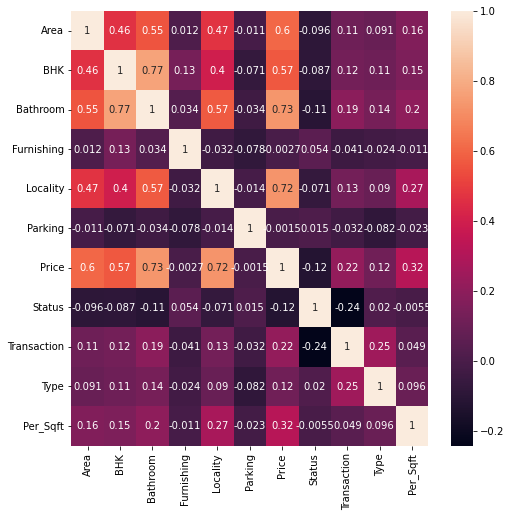

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.plot()

**Observation :-**
    All features are dependent.

## 3. Spliting Datasets.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.25)

## 4.Data Transformation

In [49]:
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,6.448274e+06,1.0,6500000,1,1,1,1.4
1,750.0,2,2.0,1,8.171429e+06,1.0,5000000,1,1,0,6667.0
2,950.0,2,2.0,2,2.109555e+07,1.0,15500000,1,0,0,6667.0
3,600.0,2,2.0,1,9.470566e+06,1.0,4200000,1,0,1,6667.0
4,650.0,2,2.0,1,2.109555e+07,1.0,6200000,1,1,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,0,2.700833e+07,3.0,55000000,1,1,1,12916.0
1255,1050.0,3,2.0,1,2.700833e+07,3.0,12500000,1,0,1,12916.0
1256,875.0,3,3.0,1,2.700833e+07,3.0,17500000,1,1,1,12916.0
1257,990.0,2,2.0,0,2.109555e+07,1.0,11500000,1,0,1,12916.0


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sd = StandardScaler()

In [52]:
scaled_data = pd.DataFrame(sd.fit_transform(data),columns=data.columns)
scaled_data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,-0.435404,0.217199,-0.525149,0.204159,-0.857057,-0.150413,-0.578725,0.233899,1.305162,0.902671,-0.622861
1,-0.469029,-0.825355,-0.525149,0.204159,-0.760596,-0.150413,-0.638201,0.233899,1.305162,-1.107823,-0.297837
2,-0.334532,-0.825355,-0.525149,1.763194,-0.037109,-0.150413,-0.221868,0.233899,-0.766188,-1.107823,-0.297837
3,-0.569901,-0.825355,-0.525149,0.204159,-0.687871,-0.150413,-0.669921,0.233899,-0.766188,0.902671,-0.297837
4,-0.536277,-0.825355,-0.525149,0.204159,-0.037109,-0.150413,-0.590620,0.233899,1.305162,0.902671,-0.297837
...,...,...,...,...,...,...,...,...,...,...,...
1171,1.795895,1.259752,2.325197,-1.354875,0.293886,0.161830,1.344337,0.233899,1.305162,0.902671,0.006874
1172,-0.267284,0.217199,-0.525149,0.204159,0.293886,0.161830,-0.340820,0.233899,-0.766188,0.902671,0.006874
1173,-0.384968,0.217199,0.424966,0.204159,0.293886,0.161830,-0.142566,0.233899,1.305162,0.902671,0.006874
1174,-0.307633,-0.825355,-0.525149,-1.354875,-0.037109,-0.150413,-0.380471,0.233899,-0.766188,0.902671,0.006874


## 5. Handling Imbalnce DataSet

In [53]:
scaled_data.describe()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03
mean,8.307791e-17,5.098199e-16,2.954930e-17,7.416592e-16,3.482664e-16,2.936049e-17,-2.333026e-17,-1.146570e-16,1.816763e-15,-7.609182e-17,2.623991e-16
std,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00
min,-9.545615e-01,-1.867909e+00,-1.475264e+00,-1.354875e+00,-1.090167e+00,-1.504131e-01,-7.968038e-01,-4.275358e+00,-7.661883e-01,-1.107823e+00,-6.228612e-01
25%,-4.354044e-01,-8.253549e-01,-5.251487e-01,-1.354875e+00,-7.463504e-01,-1.504131e-01,-6.064802e-01,2.338985e-01,-7.661883e-01,-1.107823e+00,-4.418293e-01
50%,-1.849044e-01,2.171987e-01,-5.251487e-01,2.041593e-01,-1.476608e-01,-1.504131e-01,-2.813440e-01,2.338985e-01,-7.661883e-01,9.026709e-01,-2.407614e-01
75%,1.698305e-01,2.171987e-01,4.249665e-01,2.041593e-01,2.722266e-01,5.708528e-03,1.944650e-01,2.338985e-01,1.305162e+00,9.026709e-01,1.308741e-01
max,1.536795e+01,7.515074e+00,4.225427e+00,1.763194e+00,5.565603e+00,1.749133e+01,8.679727e+00,2.338985e-01,1.305162e+00,9.026709e-01,8.316657e+00


In [54]:
X = scaled_data.drop(columns='Price')
y = scaled_data['Price']

## 6. Adressing Outliers.

In [55]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,6.448274e+06,1.0,6500000,1,1,1,1.4
1,750.0,2,2.0,1,8.171429e+06,1.0,5000000,1,1,0,6667.0
2,950.0,2,2.0,2,2.109555e+07,1.0,15500000,1,0,0,6667.0
3,600.0,2,2.0,1,9.470566e+06,1.0,4200000,1,0,1,6667.0
4,650.0,2,2.0,1,2.109555e+07,1.0,6200000,1,1,1,6667.0


1. DBSCAN :- 

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
from sklearn.cluster import KMeans

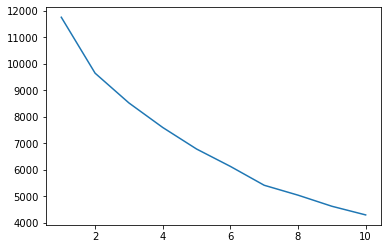

In [58]:
elbow_list = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X,y)
    elbow_list.append(km.inertia_)
plt.plot(range(1,11),elbow_list)
plt.show()

***Obeservation :-***
From elbow methode concluded that there are 2 clusters and use 2 cluster for DBSCAN.

In [59]:
for i in range(1,11):
    for j in range(1,10):
        db = DBSCAN(eps=i,min_samples=j,n_jobs=-1)
        labels = db.fit_predict(X,y)
        print("For eps={0}, min_samples={1} \nunique Labels:{2} \nIndex of scaled_data:{3} \nTotal_outliers:{4}".format(i,j,np.unique(labels),scaled_data.index[labels==-1],len(scaled_data.index[labels==-1])))
        print("*"*75)

For eps=1, min_samples=1 
unique Labels:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218] 
Index of scaled_data:Int64Index([], dtype='int64') 
Total_outliers:0


For eps=3, min_samples=1 
unique Labels:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 
Index of scaled_data:Int64Index([], dtype='int64') 
Total_outliers:0
***************************************************************************
For eps=3, min_samples=2 
unique Labels:[-1  0  1  2  3  4  5  6] 
Index of scaled_data:Int64Index([222, 230, 233, 236, 372, 516, 670, 1079, 1127, 1128], dtype='int64') 
Total_outliers:10
***************************************************************************
For eps=3, min_samples=3 
unique Labels:[-1  0  1  2  3  4  5] 
Index of scaled_data:Int64Index([222, 230, 233, 236, 372, 516, 575, 670, 1079, 1127, 1128, 1175], dtype='int64') 
Total_outliers:12
***************************************************************************
For eps=3, min_samples=4 
unique Labels:[-1  0  1  2  3  4] 
Index of scaled_data:Int64Index([ 222,  230,  233,  236,  237,  247,  372,  516,  575,  670,  917,
             918,  919,  983,  984, 1079, 1127, 1128, 1175],
    

For eps=6, min_samples=4 
unique Labels:[-1  0] 
Index of scaled_data:Int64Index([222, 917, 918, 919], dtype='int64') 
Total_outliers:4
***************************************************************************
For eps=6, min_samples=5 
unique Labels:[-1  0] 
Index of scaled_data:Int64Index([222, 516, 917, 918, 919], dtype='int64') 
Total_outliers:5
***************************************************************************
For eps=6, min_samples=6 
unique Labels:[-1  0] 
Index of scaled_data:Int64Index([222, 516, 917, 918, 919], dtype='int64') 
Total_outliers:5
***************************************************************************
For eps=6, min_samples=7 
unique Labels:[-1  0] 
Index of scaled_data:Int64Index([222, 516, 917, 918, 919], dtype='int64') 
Total_outliers:5
***************************************************************************
For eps=6, min_samples=8 
unique Labels:[-1  0] 
Index of scaled_data:Int64Index([222, 516, 917, 918, 919], dtype='int64') 
Total_outlier

In [85]:
db = DBSCAN(eps=2,min_samples=5,n_jobs=-1)

In [86]:
labels = db.fit_predict(X,y)
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

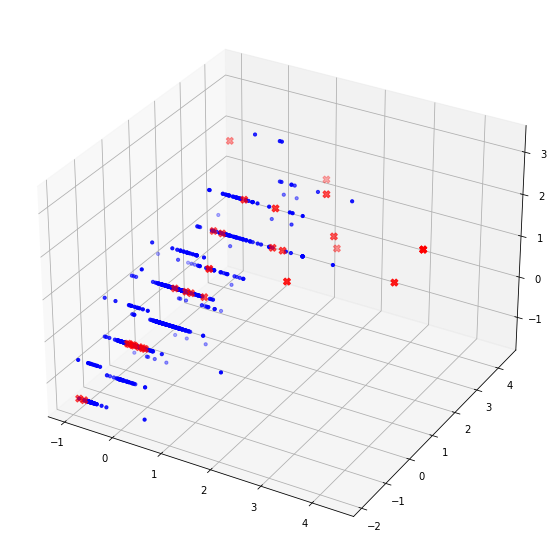

In [87]:
plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
for i in np.unique(labels):
    if i == -1 :
        axes.scatter3D(scaled_data.iloc[labels==i,0],scaled_data.iloc[labels==i,1],scaled_data.iloc[labels==i,2], s=50,c="red",marker="X")
    else:
        axes.scatter3D(scaled_data.iloc[labels==i,0],scaled_data.iloc[labels==i,1],scaled_data.iloc[labels==i,2], s=10,c="b")
plt.show()

In [88]:
scaled_data.index[labels==-1]

Int64Index([  40,   56,  102,  106,  156,  201,  202,  216,  237,  256,  267,
             313,  333,  341,  410,  483,  711,  713,  826,  827,  851,  917,
             918,  919, 1057, 1072, 1122, 1129, 1130, 1131],
           dtype='int64')

2. LocalOutlierFactor:-

In [64]:
from sklearn.neighbors import LocalOutlierFactor

In [65]:
Lof = LocalOutlierFactor(n_neighbors=2,n_jobs=-1)
LOF_list = Lof.fit_predict(X,y)

In [66]:
scaled_data.index[LOF_list==-1]

Int64Index([   6,    8,   17,   18,   21,   31,   35,   37,   38,   39,
            ...
            1126, 1134, 1141, 1144, 1145, 1152, 1159, 1164, 1166, 1173],
           dtype='int64', length=263)

***Observation:-***
According to LocalOutlierFactor There are 344 outliers which are 29% of data and above are there ranks.

3. BoxPlot :-

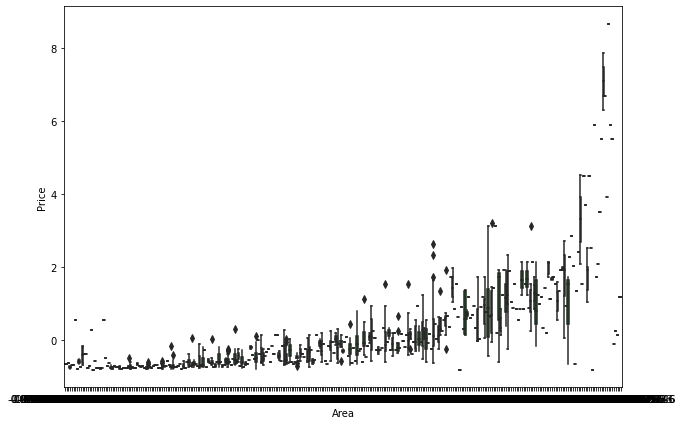

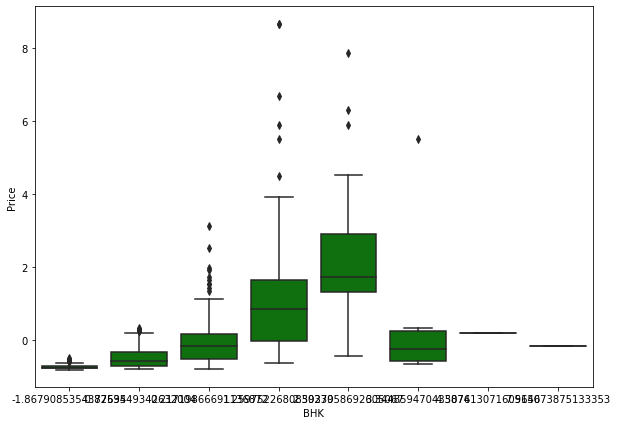

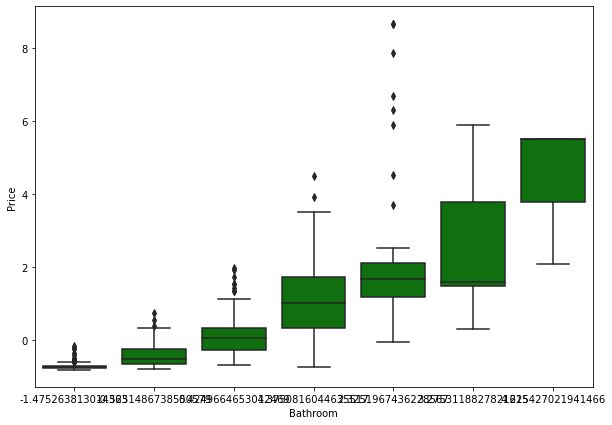

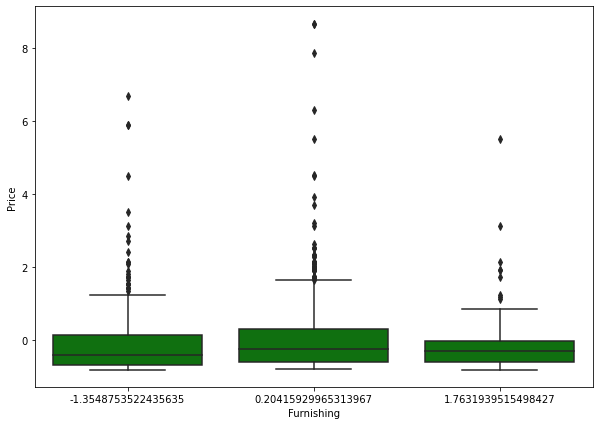

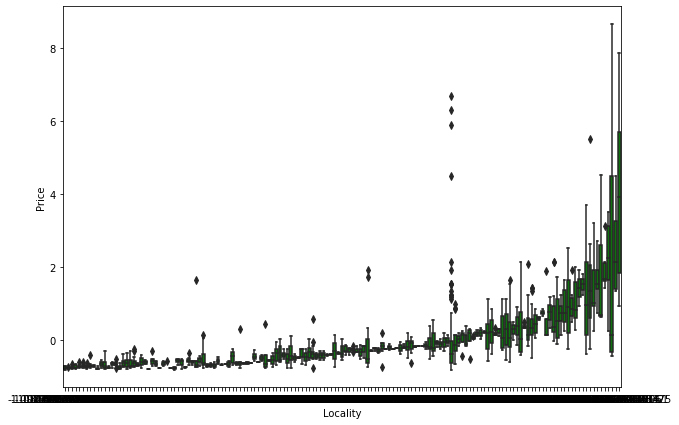

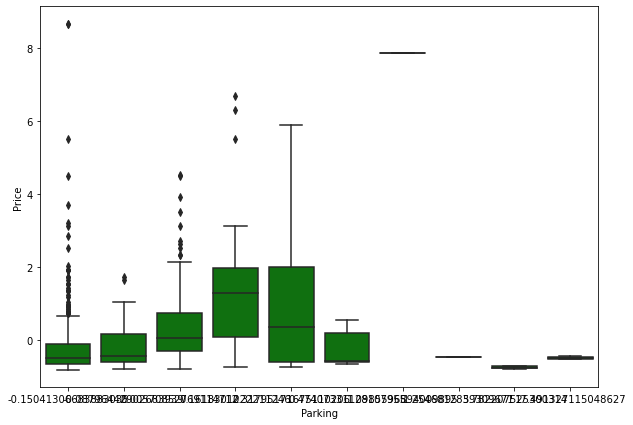

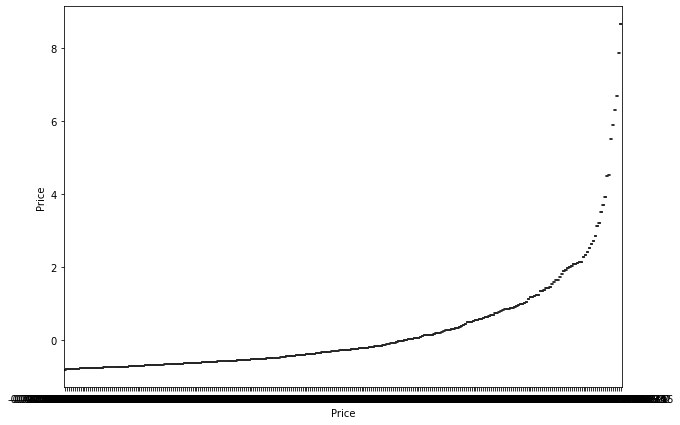

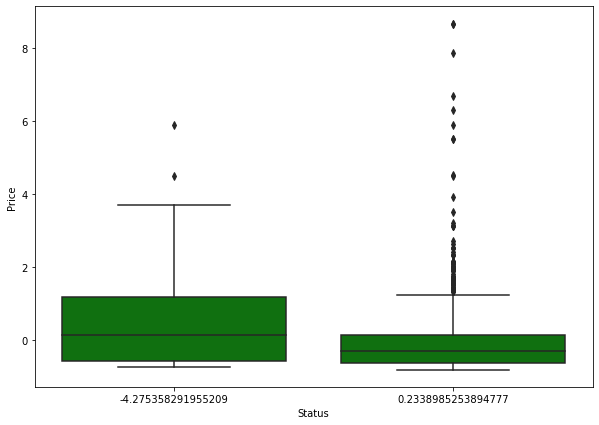

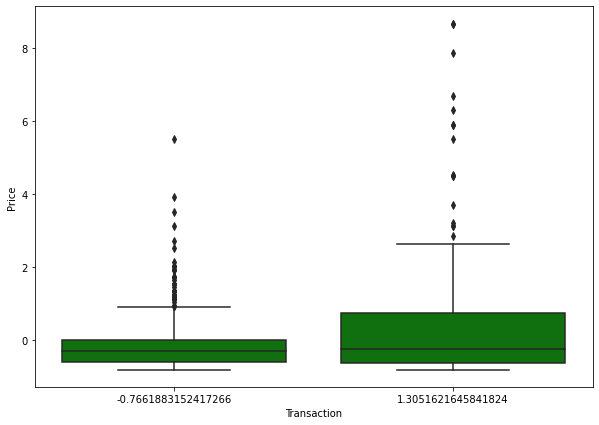

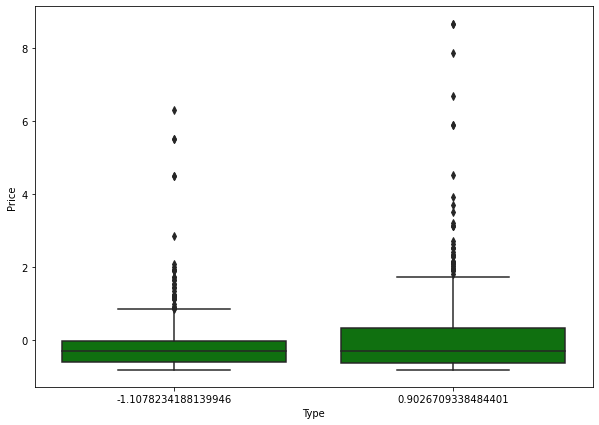

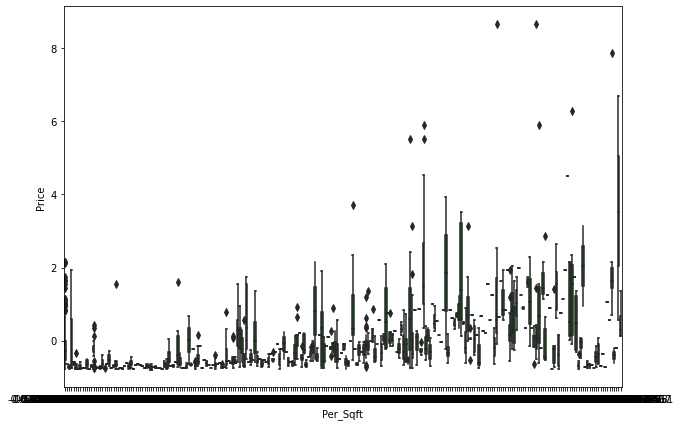

In [67]:
for i in scaled_data.columns:
    plt.figure(figsize=(10,7))
    sns.boxplot(x=i,y="Price",data=scaled_data,color="Green")

4. Isolation_Forest :-

In [68]:
from sklearn.ensemble import IsolationForest

In [69]:
for i in range(1,101):
    ISF = IsolationForest(n_estimators=i,n_jobs=-1)
    isf_list = ISF.fit_predict(X,y)
    print("n_estimators : {0} \nscaled_data : {1} \nLength : {2}".format(i,scaled_data.index[isf_list==-1],len(scaled_data.index[isf_list==-1])))
    print("*"*75)

n_estimators : 1 
scaled_data : Int64Index([   8,    9,   21,   22,   29,   35,   37,   40,   59,   66,
            ...
            1130, 1131, 1139, 1147, 1158, 1159, 1160, 1171, 1172, 1173],
           dtype='int64', length=215) 
Length : 215
***************************************************************************
n_estimators : 2 
scaled_data : Int64Index([   8,   21,   25,   29,   31,   35,   38,   45,   52,   53,
            ...
            1145, 1147, 1149, 1154, 1158, 1159, 1160, 1162, 1171, 1175],
           dtype='int64', length=346) 
Length : 346
***************************************************************************
n_estimators : 3 
scaled_data : Int64Index([   8,   31,   35,   37,   39,   40,   56,   62,   63,   66,
            ...
            1128, 1129, 1131, 1133, 1138, 1139, 1140, 1141, 1144, 1147],
           dtype='int64', length=224) 
Length : 224
***************************************************************************
n_estimators : 4 
scaled_data : Int64

n_estimators : 28 
scaled_data : Int64Index([   8,   29,   31,   37,   40,   56,   62,   66,  100,  101,
            ...
            1138, 1139, 1140, 1141, 1147, 1149, 1158, 1160, 1171, 1175],
           dtype='int64', length=191) 
Length : 191
***************************************************************************
n_estimators : 29 
scaled_data : Int64Index([   8,   22,   29,   31,   35,   37,   40,   56,   59,   62,
            ...
            1133, 1136, 1138, 1139, 1140, 1141, 1147, 1158, 1171, 1175],
           dtype='int64', length=221) 
Length : 221
***************************************************************************
n_estimators : 30 
scaled_data : Int64Index([   8,   28,   40,   56,   66,   80,  101,  102,  103,  104,
            ...
            1133, 1138, 1139, 1140, 1141, 1147, 1158, 1160, 1171, 1175],
           dtype='int64', length=188) 
Length : 188
***************************************************************************
n_estimators : 31 
scaled_data : I

n_estimators : 55 
scaled_data : Int64Index([   8,   31,   35,   37,   40,   49,   56,   66,   91,  100,
            ...
            1133, 1138, 1139, 1140, 1141, 1147, 1158, 1160, 1171, 1175],
           dtype='int64', length=209) 
Length : 209
***************************************************************************
n_estimators : 56 
scaled_data : Int64Index([   8,   22,   28,   31,   35,   37,   40,   56,   59,   62,
            ...
            1138, 1139, 1140, 1141, 1144, 1147, 1158, 1160, 1171, 1175],
           dtype='int64', length=222) 
Length : 222
***************************************************************************
n_estimators : 57 
scaled_data : Int64Index([   8,   29,   31,   35,   37,   40,   56,   59,   60,   66,
            ...
            1130, 1133, 1138, 1139, 1141, 1147, 1158, 1160, 1171, 1175],
           dtype='int64', length=209) 
Length : 209
***************************************************************************
n_estimators : 58 
scaled_data : I

n_estimators : 81 
scaled_data : Int64Index([   8,   22,   28,   29,   31,   35,   37,   40,   56,   59,
            ...
            1131, 1133, 1138, 1139, 1141, 1147, 1158, 1159, 1171, 1175],
           dtype='int64', length=235) 
Length : 235
***************************************************************************
n_estimators : 82 
scaled_data : Int64Index([   8,   22,   28,   31,   35,   37,   40,   56,   59,   62,
            ...
            1136, 1138, 1139, 1140, 1141, 1144, 1147, 1158, 1171, 1175],
           dtype='int64', length=211) 
Length : 211
***************************************************************************
n_estimators : 83 
scaled_data : Int64Index([   8,   28,   31,   35,   37,   40,   56,   62,   66,  100,
            ...
            1130, 1131, 1133, 1138, 1139, 1141, 1147, 1158, 1171, 1175],
           dtype='int64', length=181) 
Length : 181
***************************************************************************
n_estimators : 84 
scaled_data : I

In [70]:
ISF = IsolationForest(n_estimators=40,n_jobs=-1)

In [71]:
isf_list = ISF.fit_predict(X,y)

In [72]:
scaled_data.index[isf_list==-1]

Int64Index([   8,   22,   28,   31,   35,   38,   40,   56,   59,   66,
            ...
            1138, 1139, 1141, 1147, 1149, 1158, 1159, 1160, 1171, 1175],
           dtype='int64', length=209)

***Handling Outliers:-***
    Removing Outlier according to DBSCAN.

In [89]:
scaled_data.drop(scaled_data.index[labels==-1],inplace=True)
scaled_data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,-0.435404,0.217199,-0.525149,0.204159,-0.857057,-0.150413,-0.578725,0.233899,1.305162,0.902671,-0.622861
1,-0.469029,-0.825355,-0.525149,0.204159,-0.760596,-0.150413,-0.638201,0.233899,1.305162,-1.107823,-0.297837
2,-0.334532,-0.825355,-0.525149,1.763194,-0.037109,-0.150413,-0.221868,0.233899,-0.766188,-1.107823,-0.297837
3,-0.569901,-0.825355,-0.525149,0.204159,-0.687871,-0.150413,-0.669921,0.233899,-0.766188,0.902671,-0.297837
4,-0.536277,-0.825355,-0.525149,0.204159,-0.037109,-0.150413,-0.590620,0.233899,1.305162,0.902671,-0.297837
...,...,...,...,...,...,...,...,...,...,...,...
1170,-0.166411,0.217199,0.424966,0.204159,0.293886,-0.150413,-0.182217,0.233899,-0.766188,0.902671,0.006874
1171,1.795895,1.259752,2.325197,-1.354875,0.293886,0.161830,1.344337,0.233899,1.305162,0.902671,0.006874
1172,-0.267284,0.217199,-0.525149,0.204159,0.293886,0.161830,-0.340820,0.233899,-0.766188,0.902671,0.006874
1173,-0.384968,0.217199,0.424966,0.204159,0.293886,0.161830,-0.142566,0.233899,1.305162,0.902671,0.006874


## 7. Train model.

In [90]:
X = scaled_data.drop(columns="Price")
y = scaled_data["Price"]

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
LR = LinearRegression()

In [94]:
LR.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred=LR.predict(X_test)

In [96]:
from sklearn.metrics import r2_score,mean_squared_error

In [97]:
r2_score = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = mean_squared_error(y_test,y_pred,squared=False)

In [98]:
print("Training Score : ",LR.score(X_train,y_train))
print("Test Score :",LR.score(X_test,y_test))

Training Score :  0.819674580455716
Test Score : 0.8265243417309646


In [99]:
print("r2_score :",r2_score)
print("MSE_score :",MSE)
print("RMSE_score :",RMSE)

r2_score : 0.8265243417309646
MSE_score : 0.10818909842874028
RMSE_score : 0.3289211127743859


In [100]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
933,-0.550969,-0.490214
373,-0.479598,-0.644344
60,-0.761118,-0.718862
737,-0.598550,-0.209629
763,-0.499423,-0.248585
...,...,...
612,0.848703,1.008721
588,-0.194112,0.011949
1018,0.670274,0.712360
424,-0.558899,-0.683904
